In [243]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib import cm

plt.style.use("seaborn-darkgrid")

In [6]:
# setup path to sumout files
sumout_path = "../pydata/sumout_files/"
sumout_files = glob.glob(sumout_path+"*.sumout")
print(sumout_files)

['../pydata/sumout_files/BD+12_1917.sumout', '../pydata/sumout_files/BD+12_1926.sumout']


In [180]:
# read the sumout file into a pandas dataframe
# this is tricky as the sumout files are subdivided into individual tables for each species

with open(sumout_files[0]) as sumout_file:
    species_dict = {}
    lines = sumout_file.readlines()
    stellar_info = lines[0:3]
    lines = lines[4:]
    #mask out some lines that aren't needed
    mask_list = ["E.P.", "R.W.", "wavelength trends", "wav. correl.", "average abundance"]
    line_mask = [not any(x in line for x in mask_list) for line in lines]
    masked_lines = np.array(lines)[line_mask]
    
    #find the gaps between species tables
    species_gaps = np.where(masked_lines=='\n')[0]
    for idx,gap in enumerate(species_gaps):
        if idx == 0:
            last_gap = 0
        else:
            last_gap = species_gaps[idx-1]
        species_lines = masked_lines[last_gap:gap]
        
        if species_lines[0] == "\n":
            species_lines = species_lines[1:]
            
        species = species_lines[0][30:35]
        input_abund = species_lines[0][-7:-2]
        
        # read this to a tmp file
        with open("tmp.txt", "w") as out:
            for line in species_lines:
                if line[0:2] == "  ":
                    out.write(line[2:])
                else:
                    out.write(line)
        # read the tmp file out to a pandas dataframe
        df = pd.read_csv("tmp.txt", delim_whitespace=True,skiprows=1)
        species_dict[species] = (input_abund, df)
        

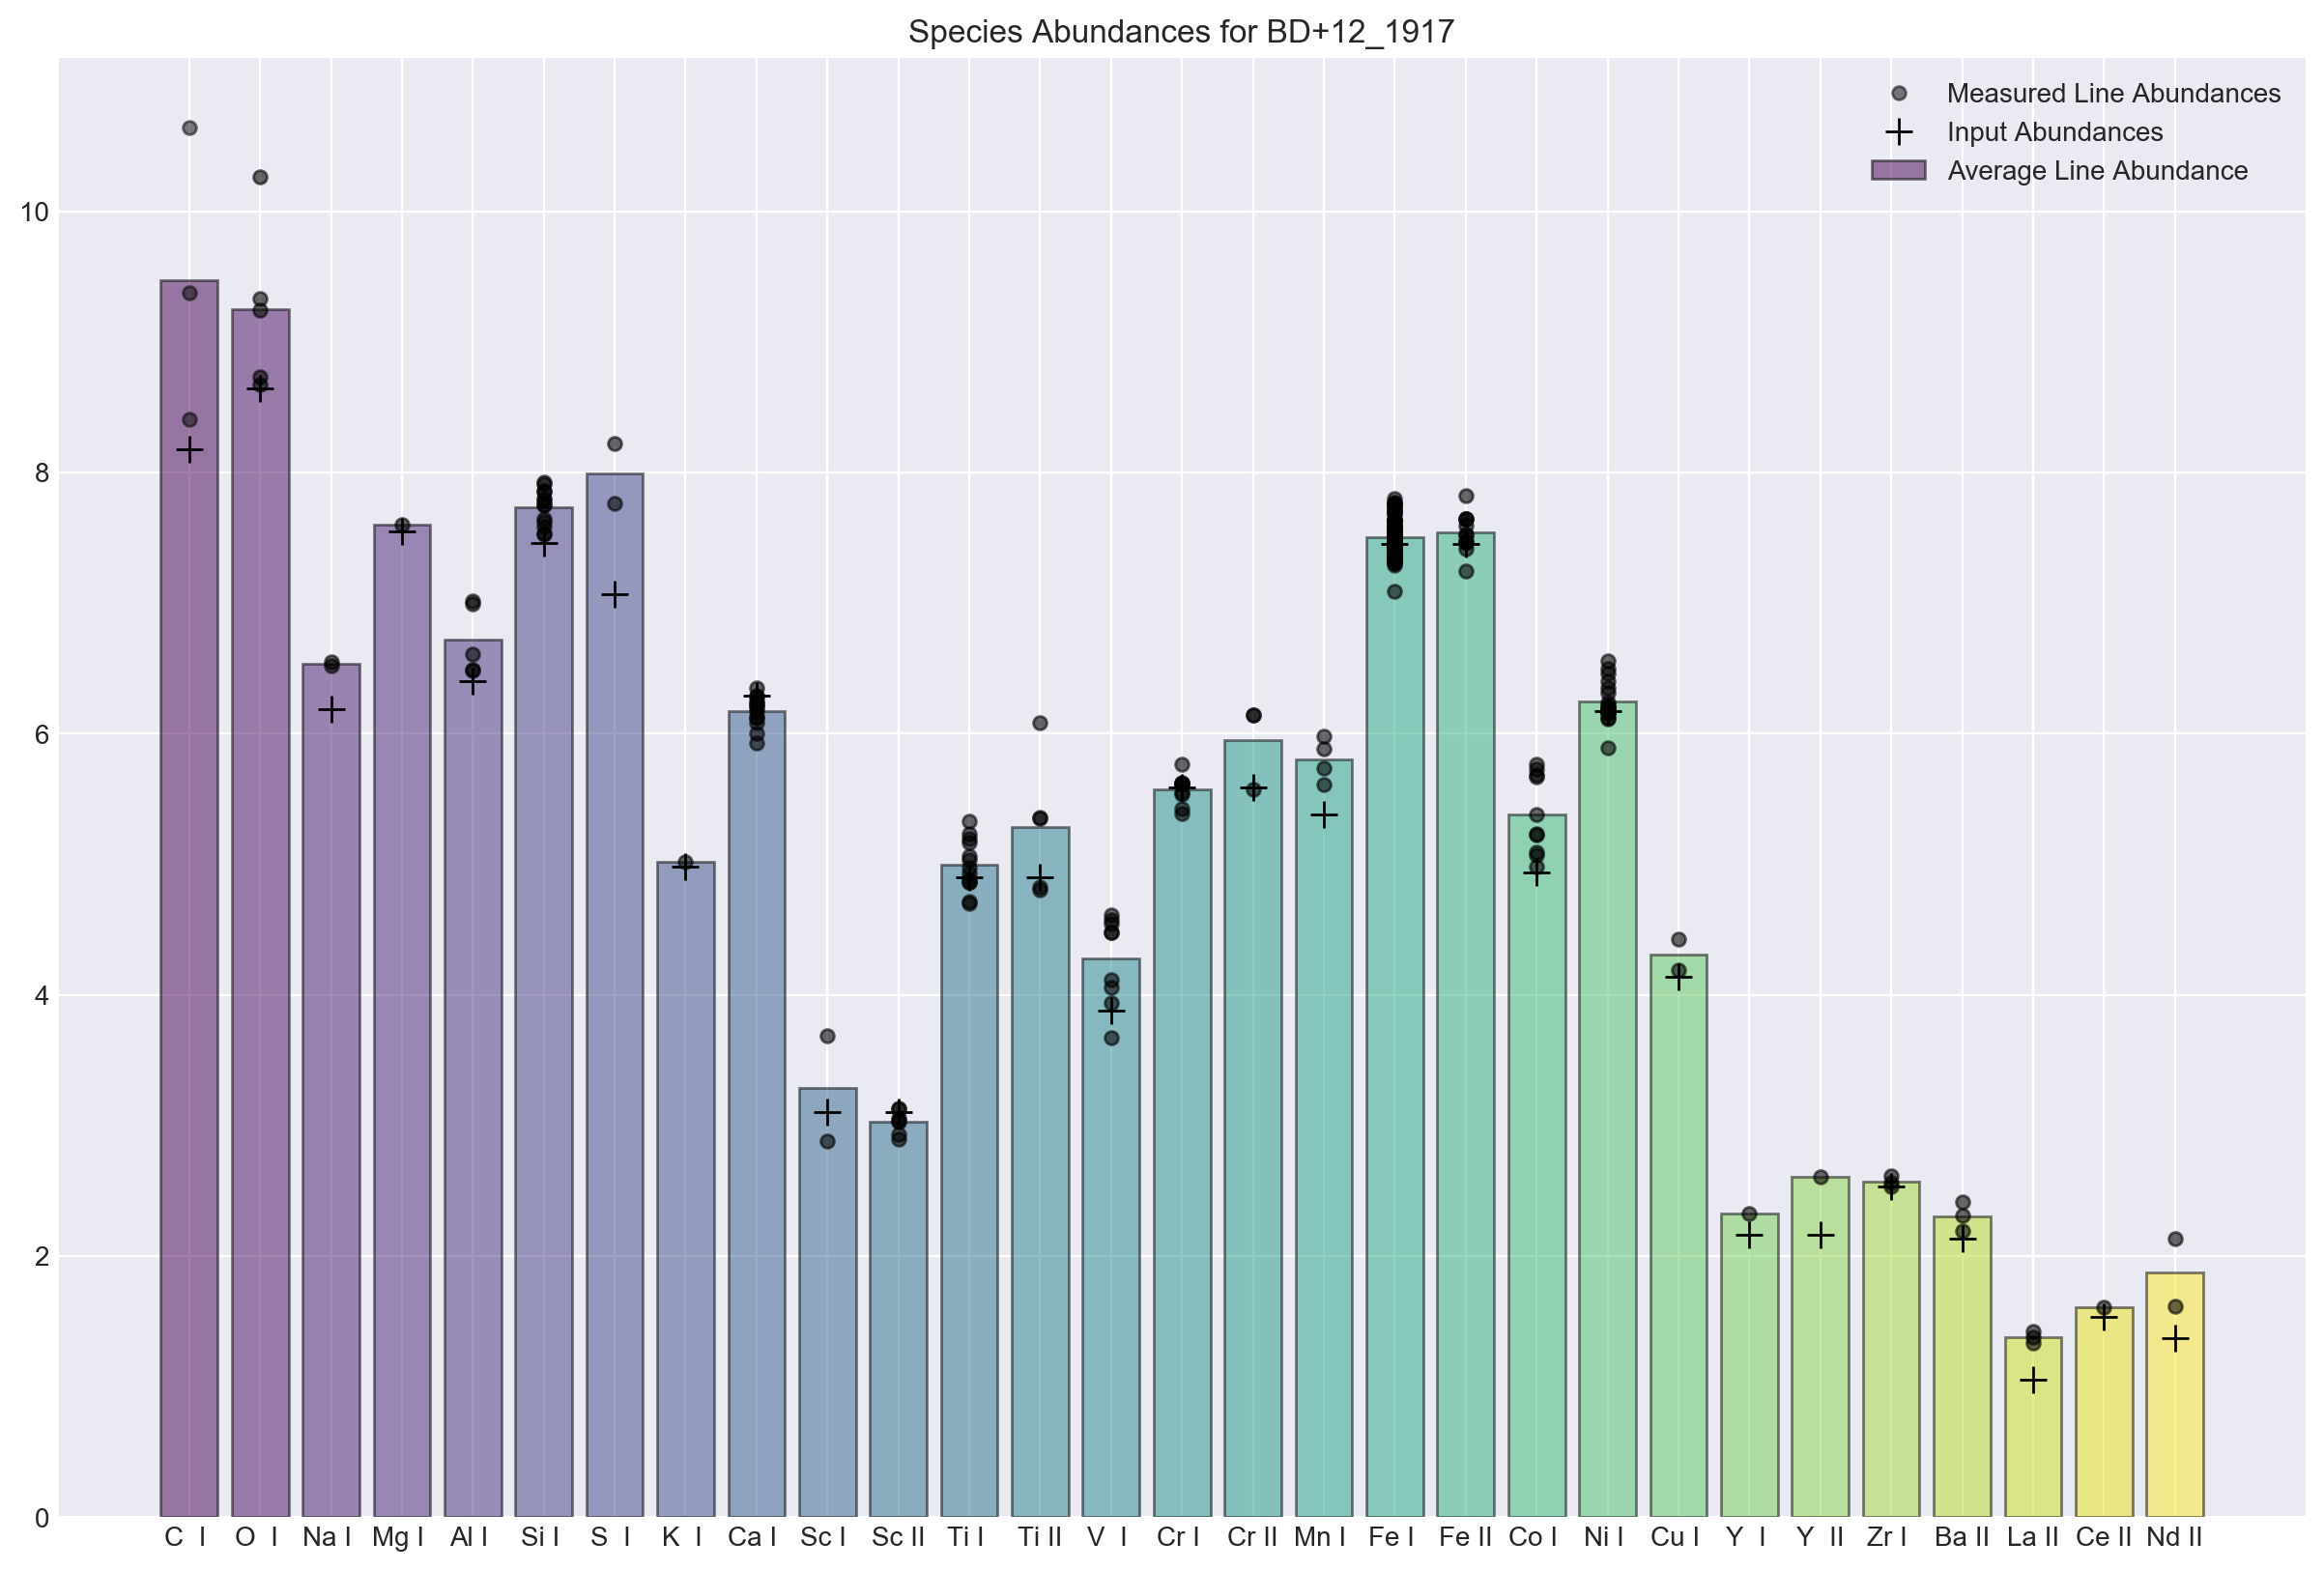

In [295]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("Species Abundances for BD+12_1917")
markersize=10
color_idx = np.linspace(0, 1, len(species_dict.keys()))
for idx, key in enumerate(species_dict.keys()):
    if idx == 0:
        input_abund, species_df = species_dict[key]
        plt.plot([key]*len(species_df['abund']), species_df['abund'], '.', alpha=0.5, color='k', label = "Measured Line Abundances", markersize=markersize)
        plt.plot([key], [float(input_abund)],  '+',color='k', label = "Input Abundances", markersize=markersize)
        #plt.plot([key], [np.mean(species_df['abund'])],  '*',color='k', label = "Average Line Abundance", markersize=markersize)
        plt.bar([key], [np.mean(species_df['abund'])], alpha=0.5,color=plt.cm.viridis(color_idx[idx]),label = "Average Line Abundance", ec='k')
        
    else:
        input_abund, species_df = species_dict[key]
        plt.plot([key]*len(species_df['abund']), species_df['abund'], '.', color='k',alpha=0.58, markersize=markersize)
        plt.plot([key], [float(input_abund)],  '+',color='k', markersize=markersize)
        #plt.plot([key], [np.mean(species_df['abund'])],  '*',color='k', markersize=markersize)
        plt.bar([key], [np.mean(species_df['abund'])],color=plt.cm.viridis(color_idx[idx]), alpha=0.5, ec='k')
plt.legend()

In [255]:
plt.cm.viridis([0.1])    

array([[0.282623, 0.140926, 0.457517, 1.      ]])